In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import tifffile as tf
import j_py_sad_correlation as jps


In [4]:
sequence = tf.imread(r"C:\Users\kross\basic_optical_gating\data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif")
reference_sequence = tf.imread(r"C:\Users\kross\basic_optical_gating\data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif")
reference_period = 3.577851226661945105e+01


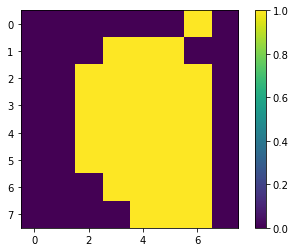

[[False False False False False False  True False]
 [False False False  True  True  True False False]
 [False False  True  True  True  True  True False]
 [False False  True  True  True  True  True False]
 [False False  True  True  True  True  True False]
 [False False  True  True  True  True  True False]
 [False False False  True  True  True  True False]
 [False False False False  True  True  True False]]


In [5]:
region_size = 32
xs = np.arange(0, sequence.shape[1], region_size)
ys = np.arange(0, sequence.shape[2], region_size)

signature = np.zeros((sequence.shape[0], xs.shape[0], ys.shape[0], reference_sequence.shape[0]))

# First lets find the regions where there is motion
reference_sequence_standard_deviation = np.std(reference_sequence, axis = 0)
reference_sequence_standard_deviation_averaged = np.empty((xs.shape[0], ys.shape[0]))
for j, x in enumerate(xs):
    for k, y in enumerate(ys):
        reference_sequence_standard_deviation_averaged[j,k] = np.mean(reference_sequence_standard_deviation[x:x+region_size,y:y+region_size])
plt.imshow(reference_sequence_standard_deviation_averaged > (np.mean(reference_sequence_standard_deviation_averaged)))
plt.colorbar()
plt.show()

regions_of_interest = reference_sequence_standard_deviation_averaged > np.mean(reference_sequence_standard_deviation_averaged)
print(regions_of_interest)
        

for i in range(sequence.shape[0]):
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            if regions_of_interest[j, k]:
                sad = jps.sad_with_references(sequence[i][x:x+region_size, y:y+region_size], reference_sequence[:,x:x+region_size,y:y+region_size])
                signature[i,j,k] = jps.sad_with_references(sequence[i][x:x+region_size, y:y+region_size], reference_sequence[:,x:x+region_size,y:y+region_size])

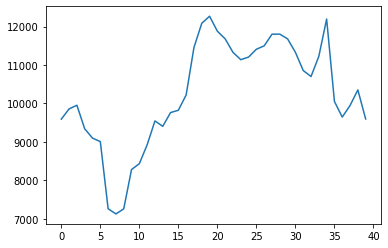

In [6]:

"""plt.plot(signature[50,3,3])
plt.plot(signature[51,3,3])
plt.plot(signature[52,3,3])
plt.plot(signature[53,3,3])
plt.show()
plt.plot(signature[54,3,3])
plt.plot(signature[55,3,3])
plt.plot(signature[56,3,3])
plt.show()"""

plt.plot(signature[50,3,3])
plt.show()